## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# print(mouse_metadata)
# print(study_results)

merged_df=study_results.merge(mouse_metadata, on='Mouse ID')
print(merged_df)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1888     m601         25           33.118756                 1    Capomulin   
1889     m601         30           31.758275                 1    Capomulin   
1890     m601         35           30.834357                 1    Capomulin   
1891     m601         40           31.378045                 1    Capomulin   
1892     m601         45           28.430964                 1    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female

In [2]:
# Checking the number of mice in the DataFrame.
mice_number=merged_df["Mouse ID"].count()
mice_number

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows= merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep= 'last')]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"],keep= False)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count= clean_df['Mouse ID'].count()
clean_mouse_count

1883

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
stats=clean_df.groupby("Drug Regimen")
mean= stats["Tumor Volume (mm3)"].mean()
median= stats["Tumor Volume (mm3)"].median()
variance= stats["Tumor Volume (mm3)"].var()
stdev= stats["Tumor Volume (mm3)"].std()
standard_error= stats["Tumor Volume (mm3)"].sem()



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Stats_df=pd.DataFrame({"Mean":mean,"Median":median,"Variance":variance,"Standard Deviation":stdev,"Standard Error":standard_error})
Stats_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

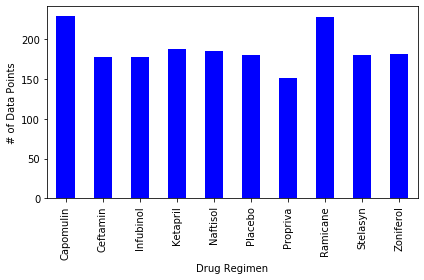

<Figure size 432x288 with 0 Axes>

In [23]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
drug_count=stats["Drug Regimen"].count()
pandas_bar= drug_count.plot(kind= 'bar', color='Blue')
pandas_bar.set_xlabel("Drug Regimen")
pandas_bar.set_ylabel("# of Data Points")
plt.tight_layout()
plt.show()

plt.savefig("Figures/Pandas Bar Plot.png")

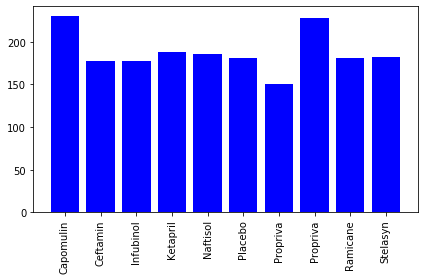

In [24]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
drugs=stats['Drug Regimen']
x_axis=np.arange(len(drugs))
x_ticks=["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Propriva","Ramicane","Stelasyn","Zoniferol"]
tick_locations=[value for value in x_axis]
plt.bar(x_axis,drug_count, color='Blue',)
plt.xticks(tick_locations,["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol",
                                    "Placebo","Propriva","Propriva","Ramicane","Stelasyn","Zoniferol"],rotation='vertical')
plt.tight_layout()
plt.savefig("Figures/MatplotLib Bar Plot.png")

## Pie Plots

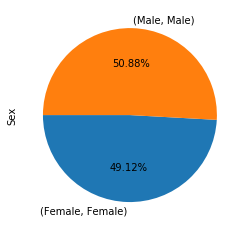

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender= clean_df.groupby("Sex")
g_count= gender['Sex'].value_counts()
pandas_pie= g_count.plot(kind="pie",startangle=180,autopct="%.2f%%")
plt.savefig("Figures/Panda Pie.png")

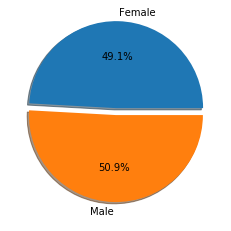

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female","Male"]
explode=(.08,0)
plt.pie(g_count,labels=labels,autopct="%1.1f%%",shadow= True, explode= explode)
plt.savefig("Figures/Matplotlib Pie.png")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
#drug_count.sort_values(ascending= False)
#(Capomulin, Ramicane, Ketapril, Naftisol)
cap_df= clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"]
ram_df= clean_df.loc[clean_df["Drug Regimen"]== "Ramicane"]
ket_df= clean_df.loc[clean_df["Drug Regimen"]== "Ketapril"]
naf_df= clean_df.loc[clean_df["Drug Regimen"]== "Naftisol"]


In [14]:
cap_1=cap_df.groupby('Mouse ID').max()["Timepoint"]
cap_2=pd.DataFrame(cap_1)
cap_3=pd.merge(cap_2,cap_df, on=("Mouse ID","Timepoint"),how= 'left')
cap_max= cap_3.groupby('Timepoint')
cap_tumor_max= cap_max['Tumor Volume (mm3)'].max()
c_tumors= cap_3['Tumor Volume (mm3)']
c_quartiles= c_tumors.quantile([.25,.5,.75])
c_lower_q= c_quartiles[0.25]
c_upper_q= c_quartiles[0.75]
c_iqr= c_upper_q-c_lower_q
c_lower_bound=c_lower_q-(1.5*c_iqr)
c_upper_bound= c_upper_q+(1.5*c_iqr)
print(f'The outliers will be lower than {c_lower_bound} and higher than {c_upper_bound}')

The outliers will be lower than 20.70456164999999 and higher than 51.83201549


In [15]:
ram_1=ram_df.groupby('Mouse ID').max()["Timepoint"]
ram_2=pd.DataFrame(ram_1)
ram_3=pd.merge(ram_2,ram_df, on=("Mouse ID","Timepoint"),how= 'left')
ram_max= ram_3.groupby('Timepoint')
ram_tumor_max= ram_3['Tumor Volume (mm3)'].max()
r_tumors= ram_3['Tumor Volume (mm3)']
r_quartiles= r_tumors.quantile([.25,.5,.75])
r_lower_q= r_quartiles[0.25]
r_upper_q= r_quartiles[0.75]
r_iqr= r_upper_q-r_lower_q
r_lower_bound=r_lower_q-(1.5*c_iqr)
r_upper_bound= r_upper_q+(1.5*c_iqr)
print(f'The outliers will be lower than {r_lower_bound} and higher than {r_upper_bound}')

The outliers will be lower than 19.887674359999995 and higher than 52.33180146000001


In [16]:
ket_1=ket_df.groupby('Mouse ID').max()["Timepoint"]
ket_2=pd.DataFrame(ket_1)
ket_3=pd.merge(ket_2,ket_df, on=("Mouse ID","Timepoint"),how= 'left')
ket_max= ket_3.groupby('Timepoint')
ket_tumor_max= ket_max['Tumor Volume (mm3)'].max()
k_tumors= ket_3['Tumor Volume (mm3)']
k_quartiles= k_tumors.quantile([.25,.5,.75])
k_lower_q= k_quartiles[0.25]
k_upper_q= k_quartiles[0.75]
k_iqr= k_upper_q-k_lower_q
k_lower_bound=k_lower_q-(1.5*c_iqr)
k_upper_bound= k_upper_q+(1.5*c_iqr)
print(f'The outliers will be lower than {k_lower_bound} and higher than {k_upper_bound}')

The outliers will be lower than 45.04730026 and higher than 81.54504598


In [17]:
naf_1=naf_df.groupby('Mouse ID').max()["Timepoint"]
naf_2=pd.DataFrame(naf_1)
naf_3=pd.merge(naf_2,naf_df, on=("Mouse ID","Timepoint"),how= 'left')
naf_max= naf_3.groupby('Timepoint')
naf_tumor_max= naf_max['Tumor Volume (mm3)'].max()
n_tumors= naf_3['Tumor Volume (mm3)']
n_quartiles= n_tumors.quantile([.25,.5,.75])
n_lower_q= n_quartiles[0.25]
n_upper_q= n_quartiles[0.75]
n_iqr= n_upper_q-n_lower_q
n_lower_bound=n_lower_q-(1.5*c_iqr)
n_upper_bound= n_upper_q+(1.5*c_iqr)
print(f'The outliers will be lower than {n_lower_bound} and higher than {n_upper_bound}')

The outliers will be lower than 40.4067149 and higher than 81.23641595000001


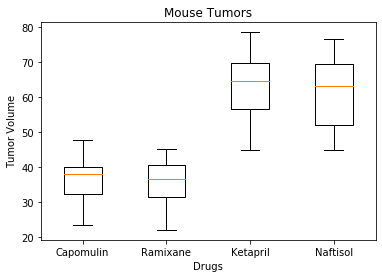

<Figure size 432x288 with 0 Axes>

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data=[c_tumors,r_tumors,k_tumors,n_tumors]

fig,ax= plt.subplots()
ax.boxplot(data,labels= ["Capomulin","Ramixane","Ketapril","Naftisol"])
ax.set_title('Mouse Tumors')
ax.set_ylabel("Tumor Volume")
ax.set_xlabel("Drugs")
plt.show()
plt.savefig("Figures/Box & Whiskers.png")

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

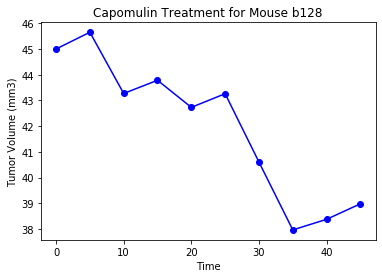

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Cap_line =cap_df.loc[cap_df["Mouse ID"]== "b128",:]
time= Cap_line["Timepoint"]
c_tumor_volume= Cap_line["Tumor Volume (mm3)"]
plt.plot(time,c_tumor_volume,color="blue",marker='o')
plt.title("Capomulin Treatment for Mouse b128")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")

Text(0.5, 1.0, 'Weight vs Tumor Volume')

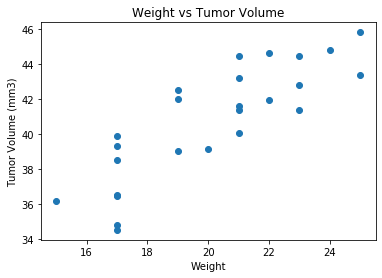

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_avg=cap_df.groupby("Mouse ID").mean()
avg_tumors= cap_avg["Tumor Volume (mm3)"]
avg_weight= cap_avg["Weight (g)"]
plt.scatter(avg_weight,avg_tumors)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume")

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cap_corr=round(st.pearsonr(avg_weight,avg_tumors)[0],2)
print(f"The Correlation coefficient is {cap_corr}")

The Correlation coefficient is 0.84


Text(0.5, 1.0, 'Weight vs Tumor Volume')

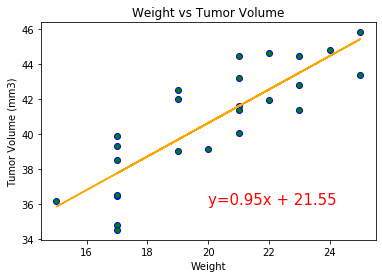

In [22]:
(slope, intercept, rvalue, pvalue, stderr)=linregress(avg_weight,avg_tumors)
line_eq=f"y={round(slope,2)}x + {round(intercept,2)}"
regress_values= avg_weight*slope+intercept
plt.scatter(avg_weight,avg_tumors, facecolor='green',edgecolor='blue')
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(avg_weight,regress_values,color='orange')
plt.annotate(line_eq,(20,36),fontsize= 15, color='red')

plt.title("Weight vs Tumor Volume")